<a href="https://colab.research.google.com/github/yashvi000/ML-Tutorial/blob/main/Classification%20Models/Classification_%5BMAGIC_GAMMA_dataset%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Magic Gamma Telescope Dataset : two classes - Gamma 'g' and Hadron 'h'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [3]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [4]:
df["class"] = (df["class"] == 'g').astype(int)

In [5]:
df["class"].unique()

array([1, 0])

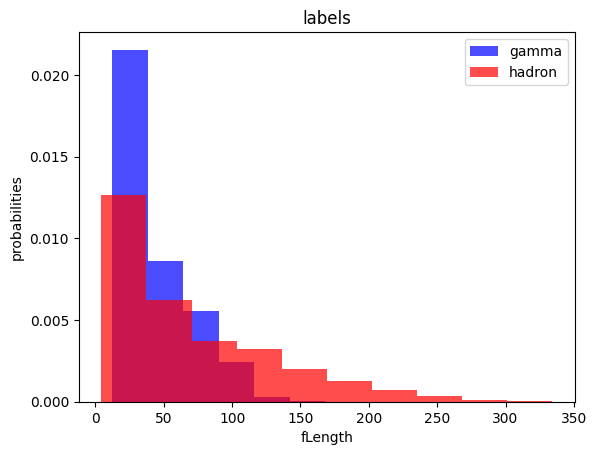

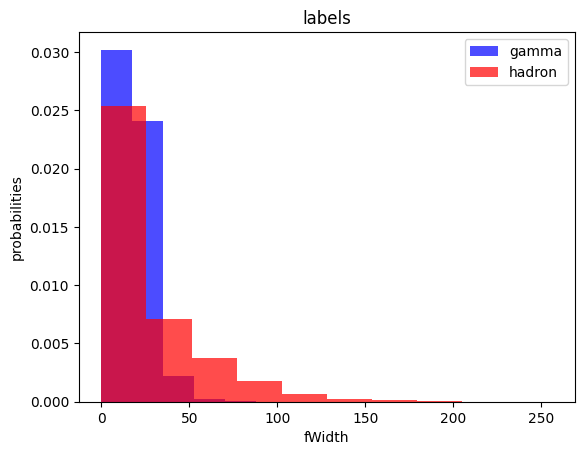

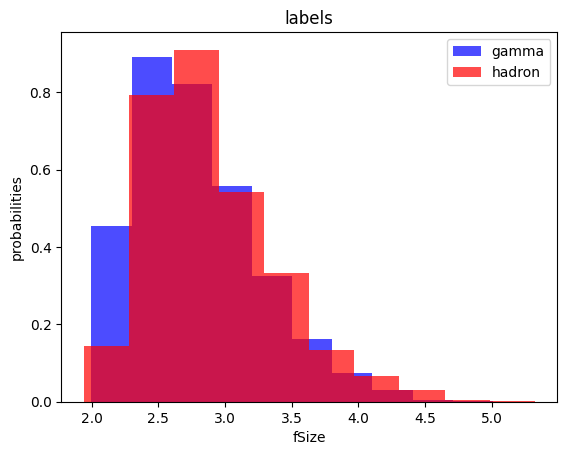

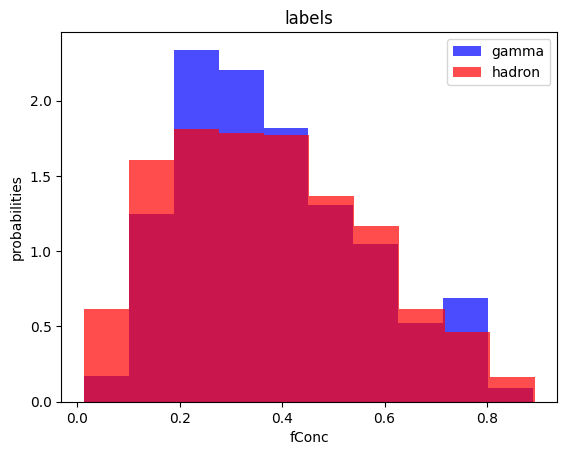

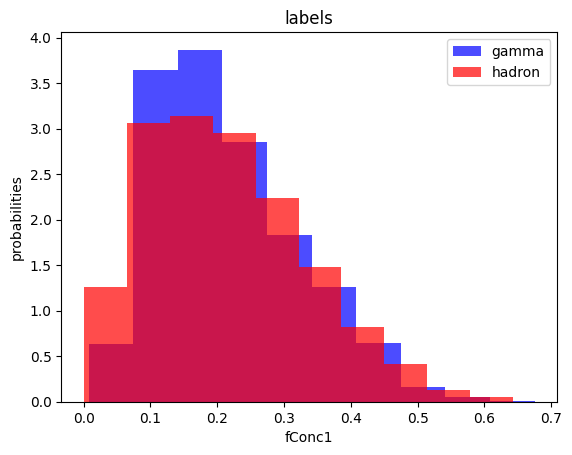

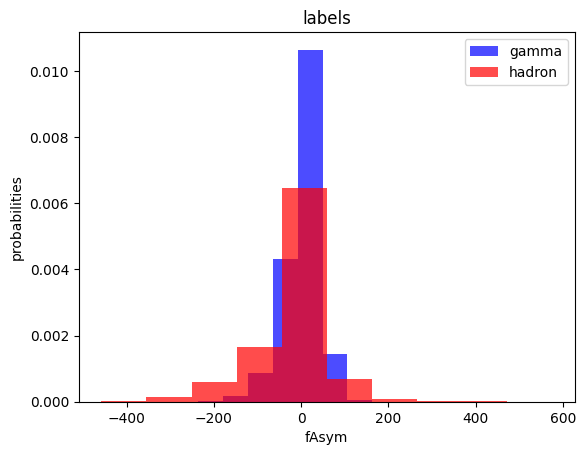

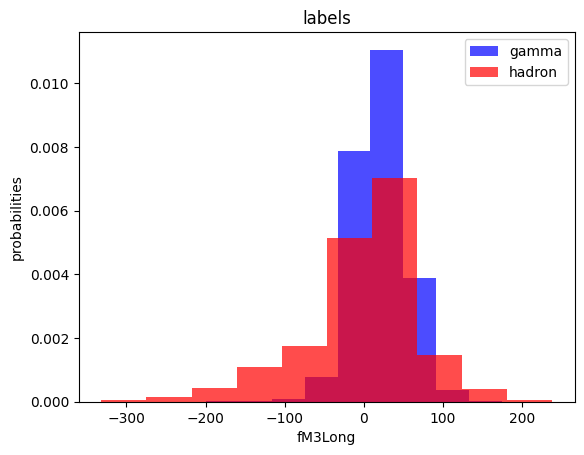

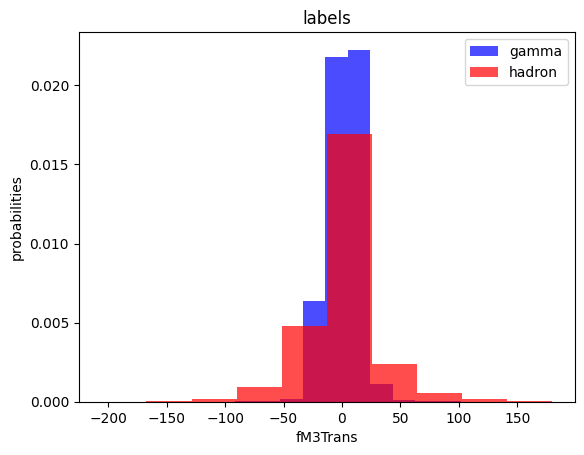

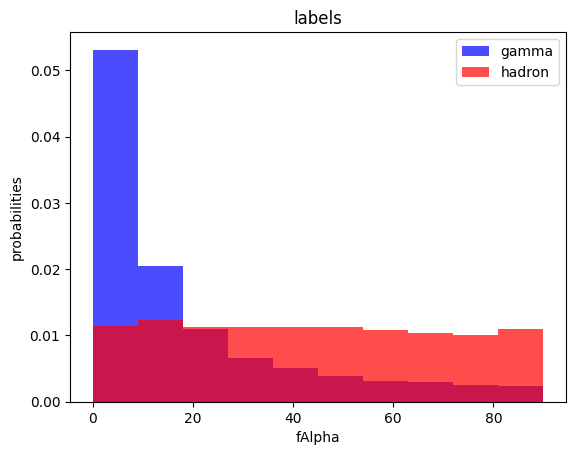

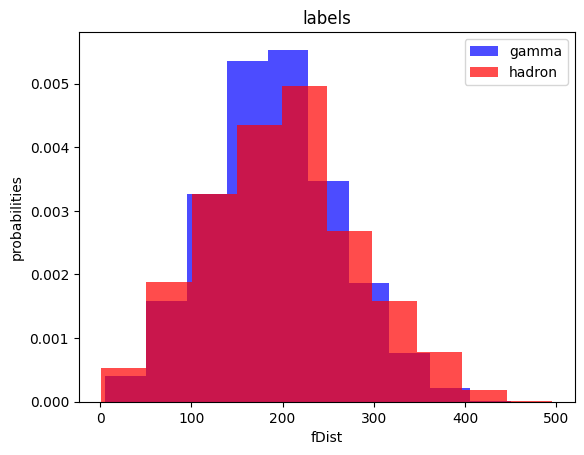

In [6]:
for labels in cols[:-1] :
  plt.hist(df[df["class"]==1][labels], color="blue", label="gamma", alpha=0.7, density=True)   # setting density to True means calculating probability
  plt.hist(df[df["class"]==0][labels], color="red", label="hadron", alpha=0.7, density=True)
  plt.title("labels")
  plt.xlabel(labels)
  plt.ylabel("probabilities")
  plt.legend()
  plt.show()

# Train, Validation and Test datasets

In [7]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])    # Train = 60%, Validation = 20%, Test = 20%

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [8]:
print(len(train[train["class"]==1]))  #gamma
print(len(train[train["class"]==0]))  #hadron

7385
4027


In [9]:
def scale_dataset(dataframe, oversample=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()            # used to standardize values of feature vectors (eg.:- age(yrs) << income(thousands))
  x = scaler.fit_transform(x)          # if not used, can cause exploding/vanishing gradient
                                       # it helps with L1/L2 regularization, stability, performance and equal comparison of features
  if oversample:
    ros = RandomOverSampler()
    x, y = ros.fit_resample(x, y)

  data = np.hstack((x,np.reshape(y, (-1,1))))  # -1 means len(y)
  return data, x, y

In [10]:
train, x_train, y_train = scale_dataset(train, oversample=True)      # Oversampling training data to make number of Gamma's and Hadron's equal
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)         # oversampling is not done for validation and test dataset

In [11]:
print(len(y_train), sum(y_train==1), sum(y_train==0))

14770 7385 7385


#KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [13]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [14]:
y_pred = knn_model.predict(x_test)

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1351
           1       0.86      0.86      0.86      2453

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



#Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [18]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.40      0.51      1351
           1       0.73      0.90      0.81      2453

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.71      0.72      0.70      3804



#Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lgr_model = LogisticRegression()
lgr_model = lgr_model.fit(x_train, y_train)

In [21]:
y_pred = lgr_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72      1351
           1       0.85      0.83      0.84      2453

    accuracy                           0.80      3804
   macro avg       0.78      0.78      0.78      3804
weighted avg       0.80      0.80      0.80      3804



#SVM Classifier

In [22]:
from sklearn.svm import SVC

In [23]:
svc_model = SVC()
svc_model = svc_model.fit(x_train, y_train)

In [24]:
y_pred = svc_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1351
           1       0.90      0.90      0.90      2453

    accuracy                           0.87      3804
   macro avg       0.86      0.86      0.86      3804
weighted avg       0.87      0.87      0.87      3804



#Neural Networks Classifier

In [25]:
import tensorflow as tf

In [26]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Binary Cross Entropy')
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

In [27]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss="binary_crossentropy",
                 metrics=['accuracy'])

In [28]:
history = nn_model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7651 - loss: 0.5096 - val_accuracy: 0.6269 - val_loss: 0.6260
Epoch 2/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8268 - loss: 0.3994 - val_accuracy: 0.6466 - val_loss: 0.6512
Epoch 3/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8468 - loss: 0.3681 - val_accuracy: 0.7045 - val_loss: 0.5822
Epoch 4/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8506 - loss: 0.3599 - val_accuracy: 0.7062 - val_loss: 0.5903
Epoch 5/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8587 - loss: 0.3440 - val_accuracy: 0.7502 - val_loss: 0.4918
Epoch 6/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8605 - loss: 0.3360 - val_accuracy: 0.7776 - val_loss: 0.4448
Epoch 7/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8575 - loss: 0.3413 - val_accuracy: 0.7028 - val_loss: 0.5747
Epoch 8/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8620 - loss: 0.3295 - val_accu

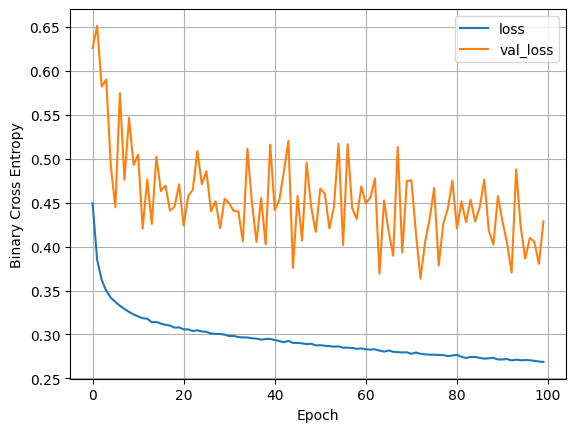

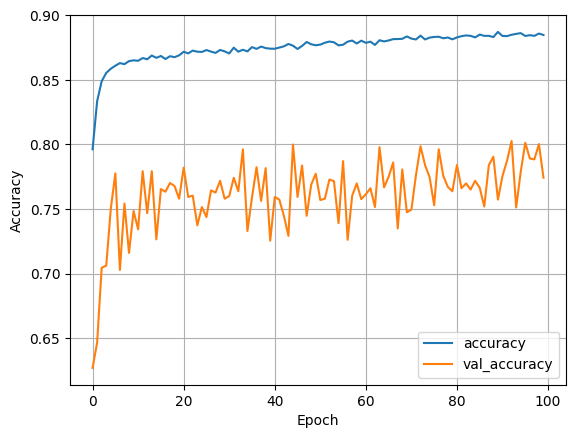

In [29]:
plot_loss(history)
plot_accuracy(history)

In [30]:
def train_nn_model(x_train, y_train, num_nodes, dropout_prob, alpha, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation="relu", input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation="relu"),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation="sigmoid")
  ])
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(alpha), loss="binary_crossentropy",
                  metrics=['accuracy'])
  history = nn_model.fit(
      x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_valid, y_valid), verbose=0)
  return nn_model, history

In [31]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))     # 1 row and 2 columns
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary Cross Entropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

16 nodes, dropout 0, alpha 0.1, batch_size 32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


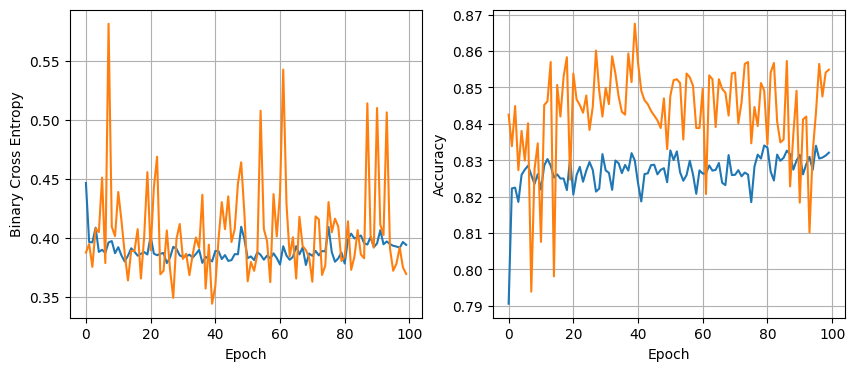

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8521 - loss: 0.3786
16 nodes, dropout 0, alpha 0.1, batch_size 64


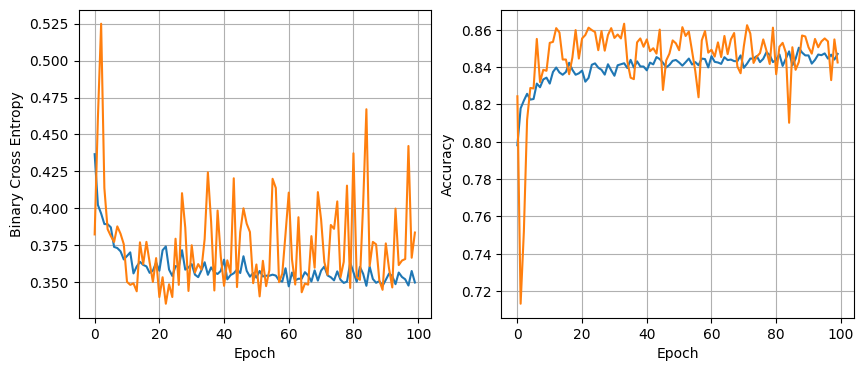

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8294 - loss: 0.3980
16 nodes, dropout 0, alpha 0.1, batch_size 128


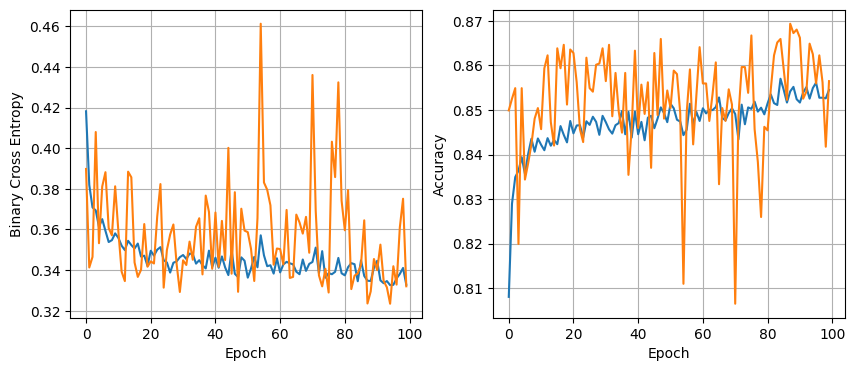

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8483 - loss: 0.3381
16 nodes, dropout 0, alpha 0.005, batch_size 32


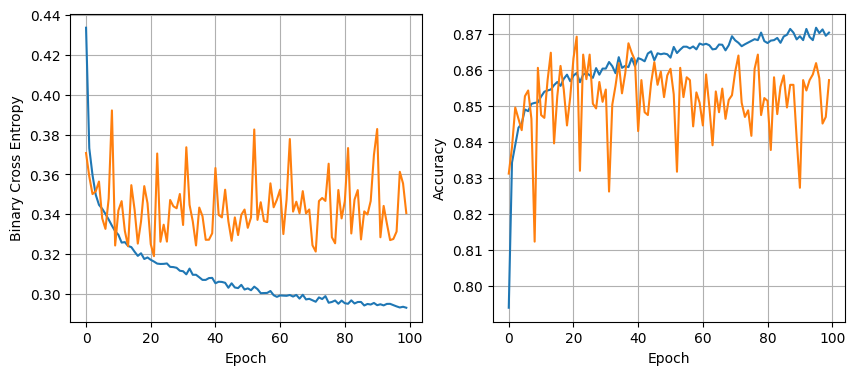

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8496 - loss: 0.3571
16 nodes, dropout 0, alpha 0.005, batch_size 64


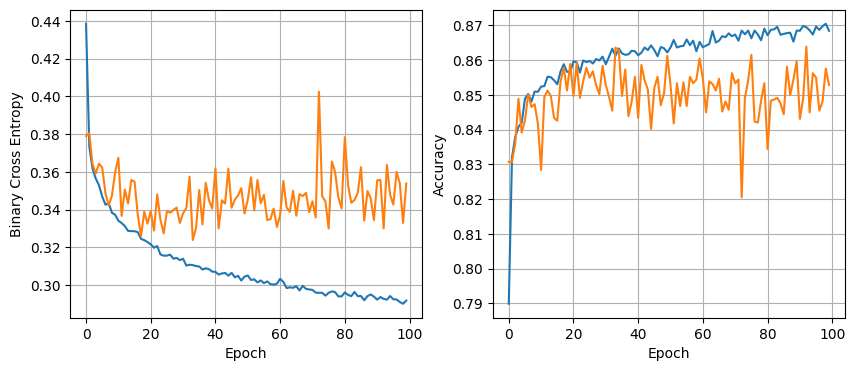

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8491 - loss: 0.3573
16 nodes, dropout 0, alpha 0.005, batch_size 128


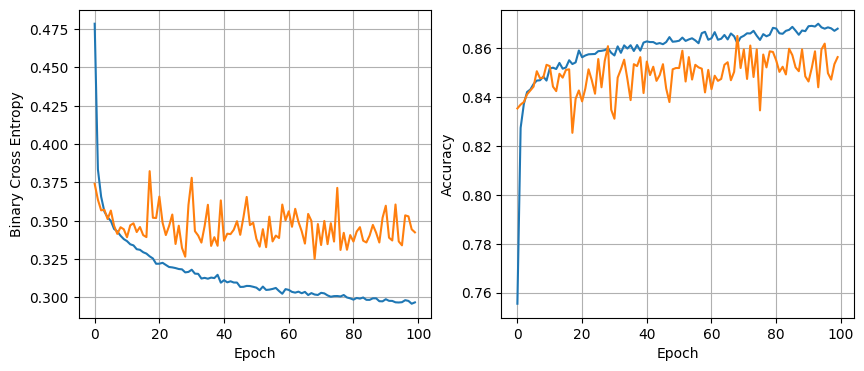

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8526 - loss: 0.3491
16 nodes, dropout 0, alpha 0.001, batch_size 32


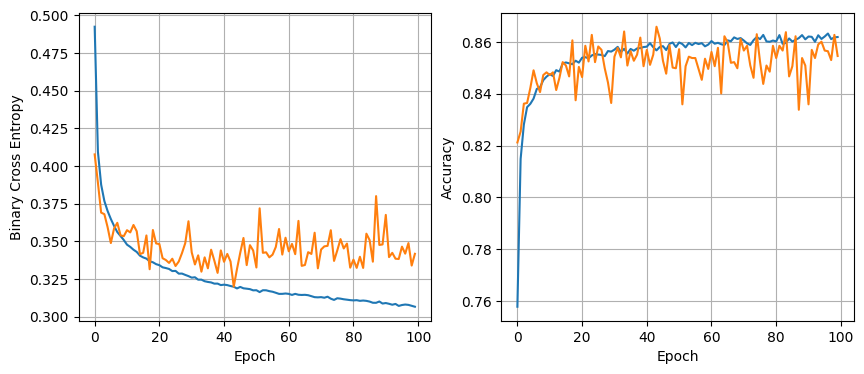

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8509 - loss: 0.3474
16 nodes, dropout 0, alpha 0.001, batch_size 64


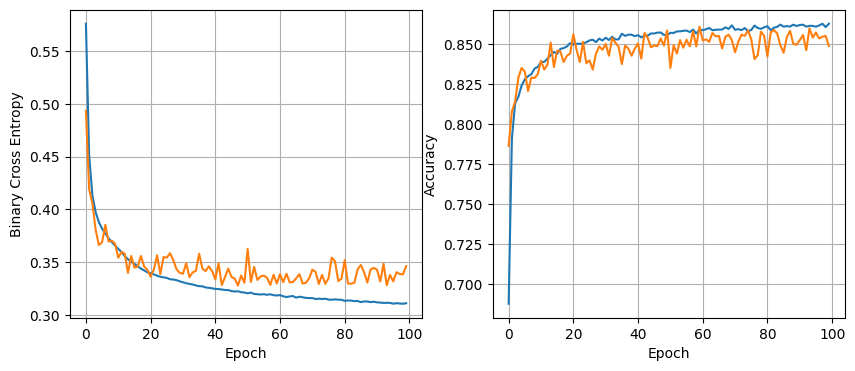

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8427 - loss: 0.3478
16 nodes, dropout 0, alpha 0.001, batch_size 128


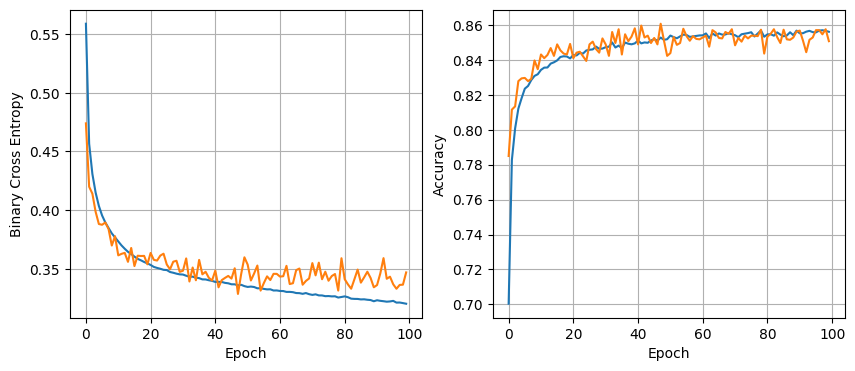

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8410 - loss: 0.3585
16 nodes, dropout 0.2, alpha 0.1, batch_size 32


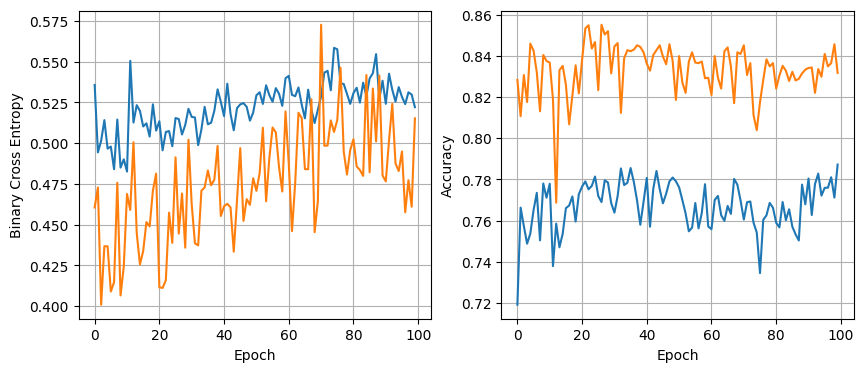

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8281 - loss: 0.5213
16 nodes, dropout 0.2, alpha 0.1, batch_size 64


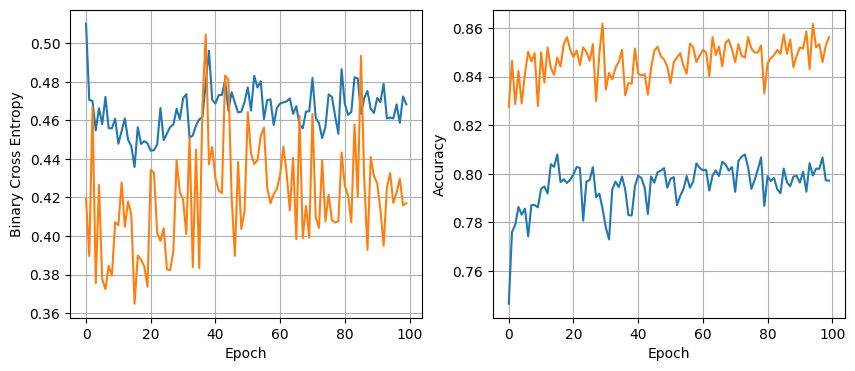

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8557 - loss: 0.4238
16 nodes, dropout 0.2, alpha 0.1, batch_size 128


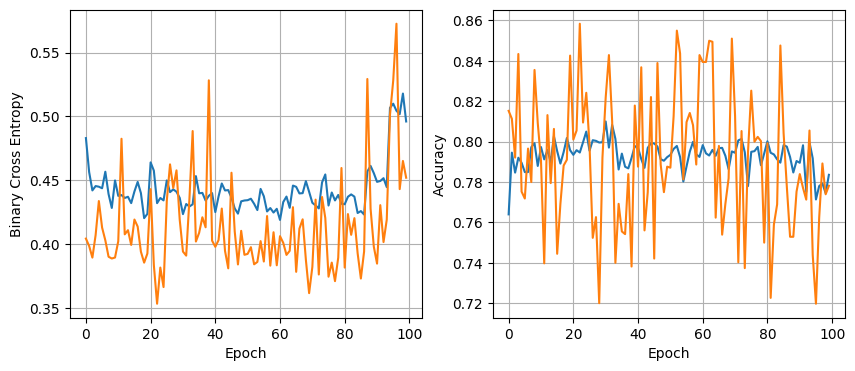

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7695 - loss: 0.4647
16 nodes, dropout 0.2, alpha 0.005, batch_size 32


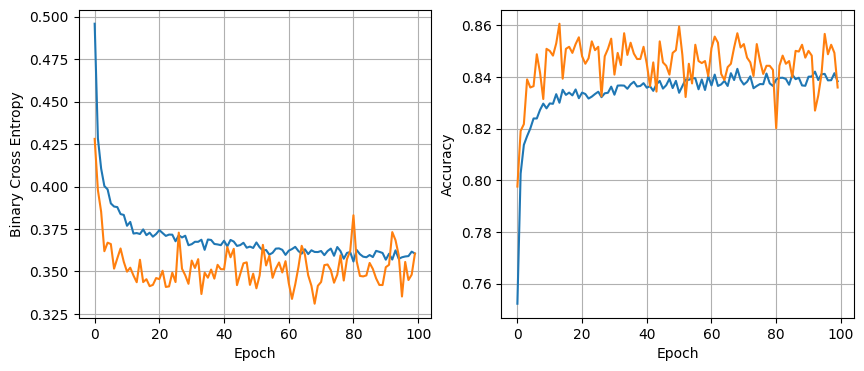

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8288 - loss: 0.3649
16 nodes, dropout 0.2, alpha 0.005, batch_size 64


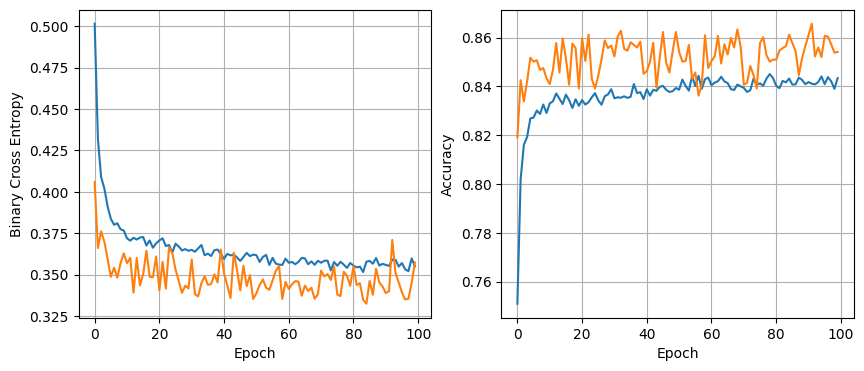

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8479 - loss: 0.3671
16 nodes, dropout 0.2, alpha 0.005, batch_size 128


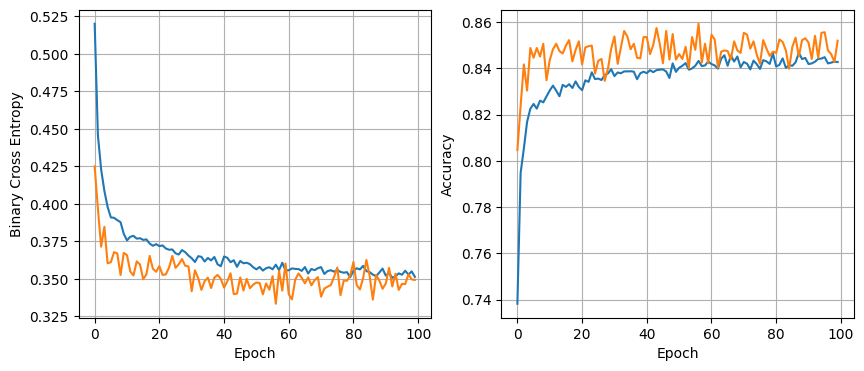

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8489 - loss: 0.3573
16 nodes, dropout 0.2, alpha 0.001, batch_size 32


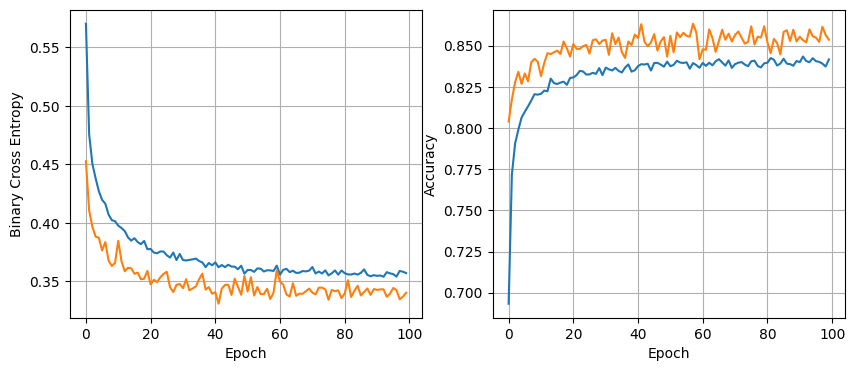

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8499 - loss: 0.3480
16 nodes, dropout 0.2, alpha 0.001, batch_size 64


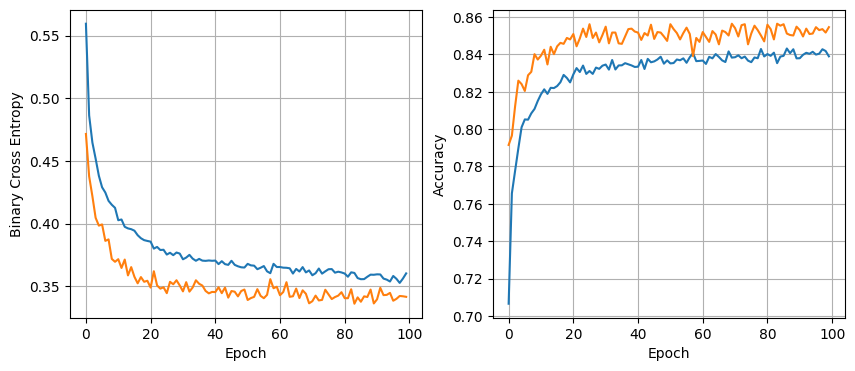

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8498 - loss: 0.3475
16 nodes, dropout 0.2, alpha 0.001, batch_size 128


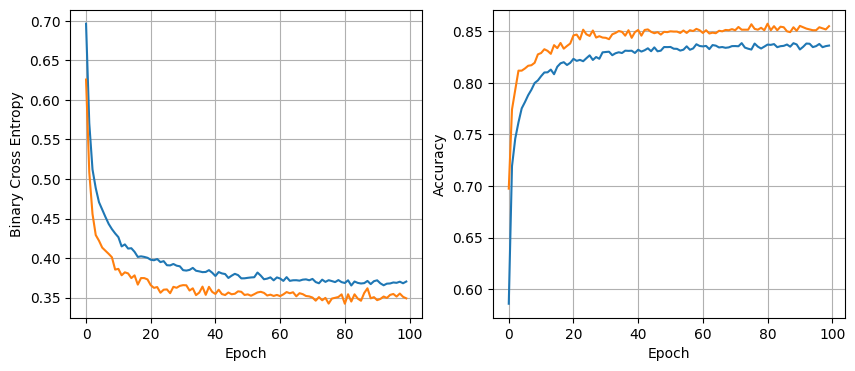

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8490 - loss: 0.3584
32 nodes, dropout 0, alpha 0.1, batch_size 32


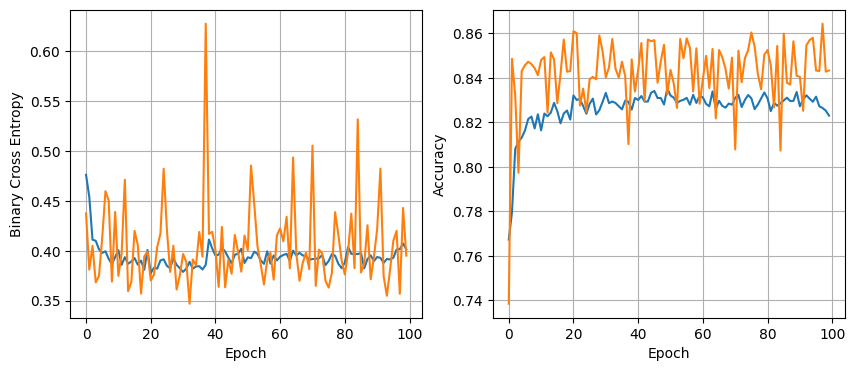

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8396 - loss: 0.4018
32 nodes, dropout 0, alpha 0.1, batch_size 64


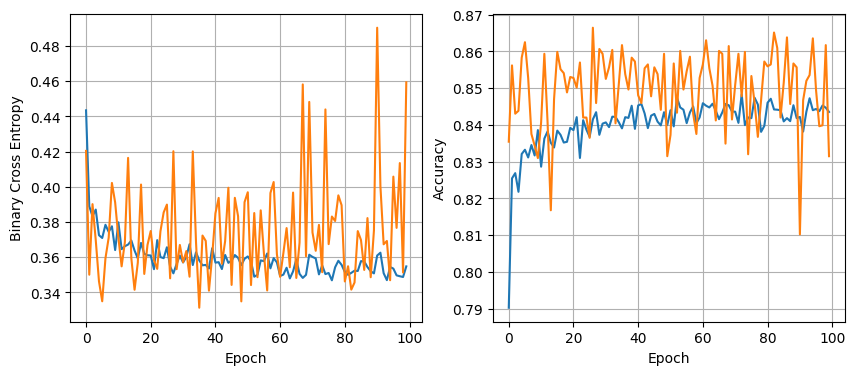

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8242 - loss: 0.4696
32 nodes, dropout 0, alpha 0.1, batch_size 128


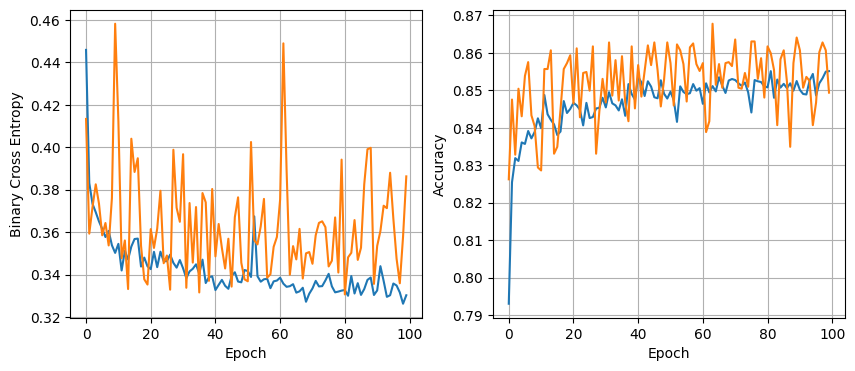

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8432 - loss: 0.4070
32 nodes, dropout 0, alpha 0.005, batch_size 32


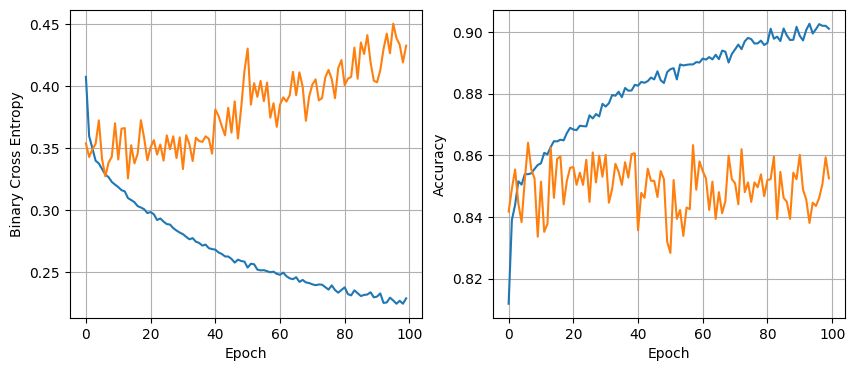

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8468 - loss: 0.4395
32 nodes, dropout 0, alpha 0.005, batch_size 64


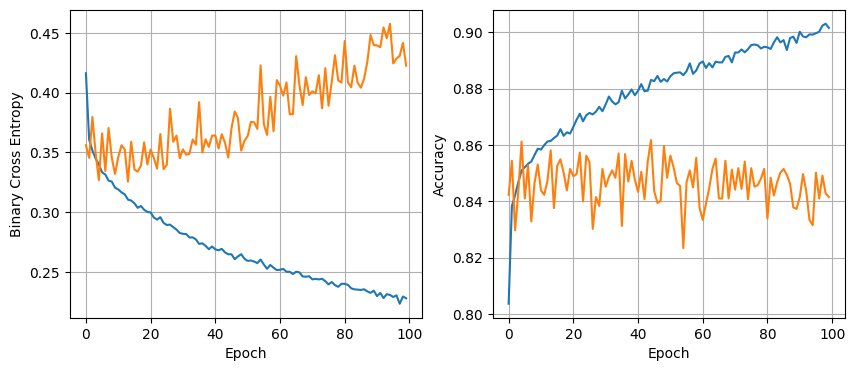

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8419 - loss: 0.4229
32 nodes, dropout 0, alpha 0.005, batch_size 128


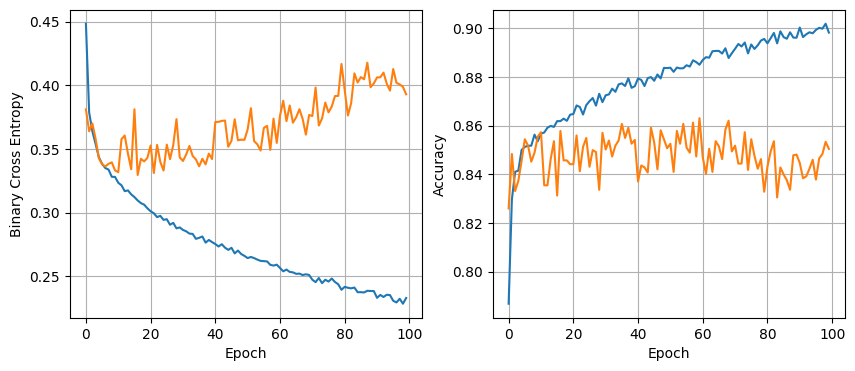

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8508 - loss: 0.3975
32 nodes, dropout 0, alpha 0.001, batch_size 32


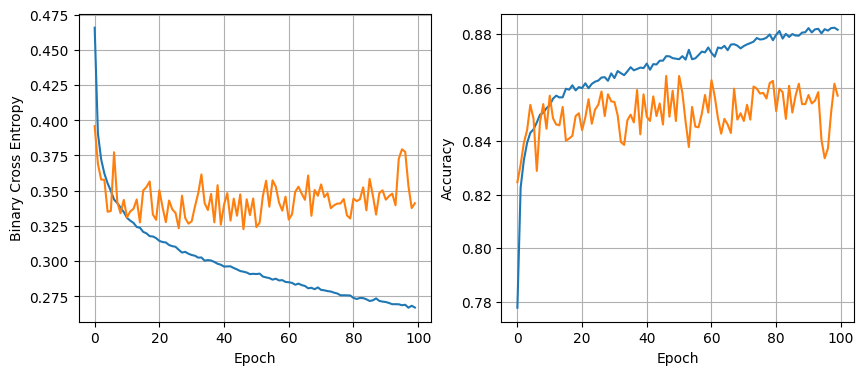

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8540 - loss: 0.3559
32 nodes, dropout 0, alpha 0.001, batch_size 64


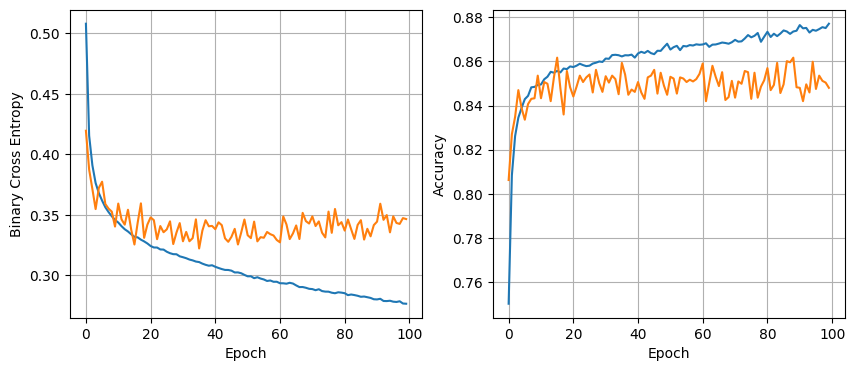

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8418 - loss: 0.3603
32 nodes, dropout 0, alpha 0.001, batch_size 128


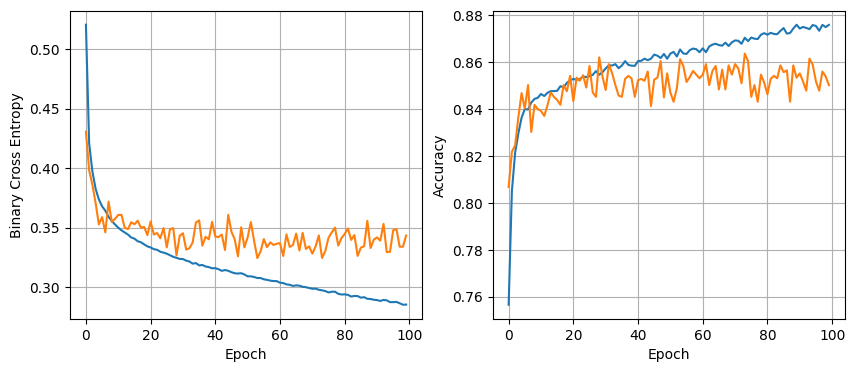

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8397 - loss: 0.3547
32 nodes, dropout 0.2, alpha 0.1, batch_size 32


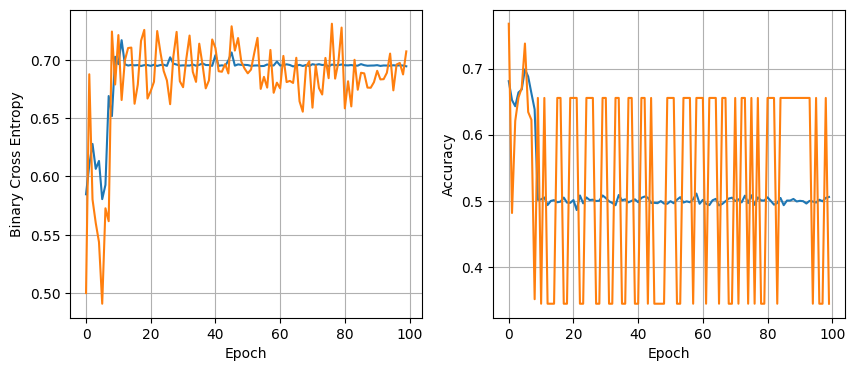

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3488 - loss: 0.7069
32 nodes, dropout 0.2, alpha 0.1, batch_size 64


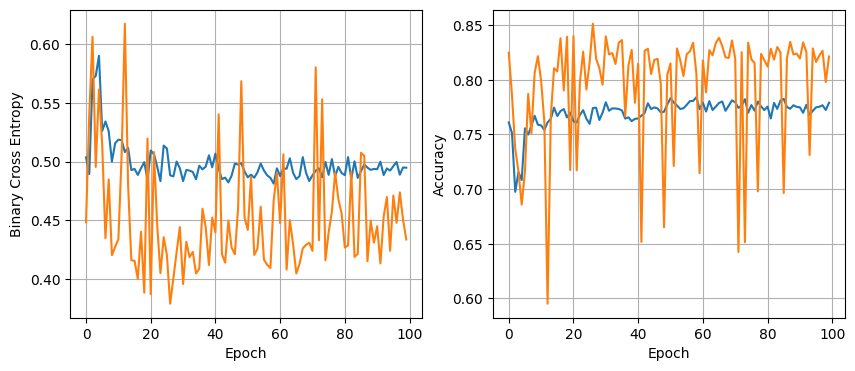

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8214 - loss: 0.4382
32 nodes, dropout 0.2, alpha 0.1, batch_size 128


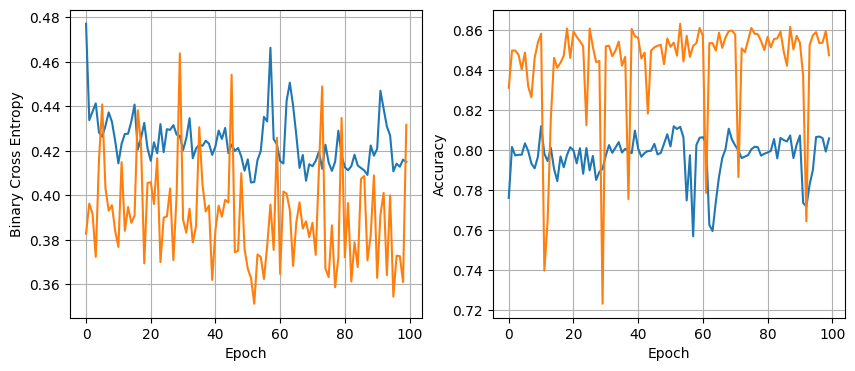

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8403 - loss: 0.4475
32 nodes, dropout 0.2, alpha 0.005, batch_size 32


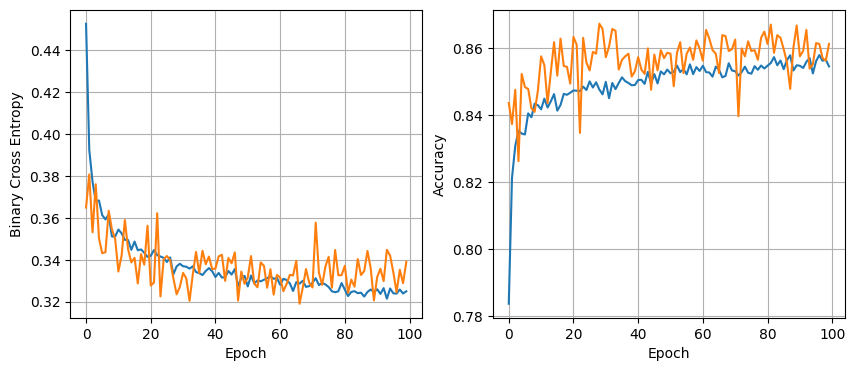

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8599 - loss: 0.3470
32 nodes, dropout 0.2, alpha 0.005, batch_size 64


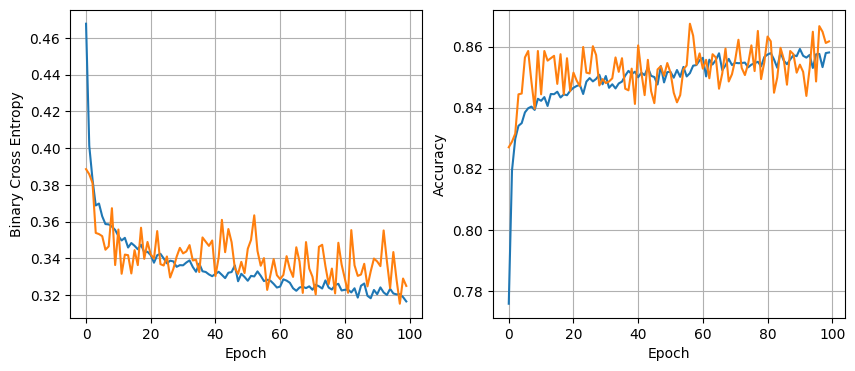

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8589 - loss: 0.3279
32 nodes, dropout 0.2, alpha 0.005, batch_size 128


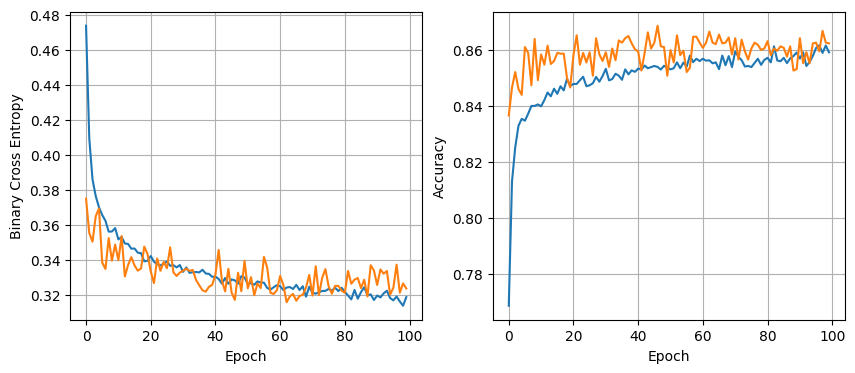

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8601 - loss: 0.3278
32 nodes, dropout 0.2, alpha 0.001, batch_size 32


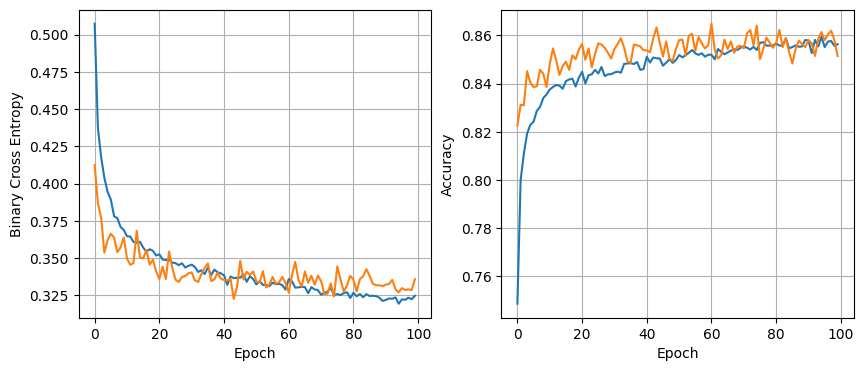

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8451 - loss: 0.3457
32 nodes, dropout 0.2, alpha 0.001, batch_size 64


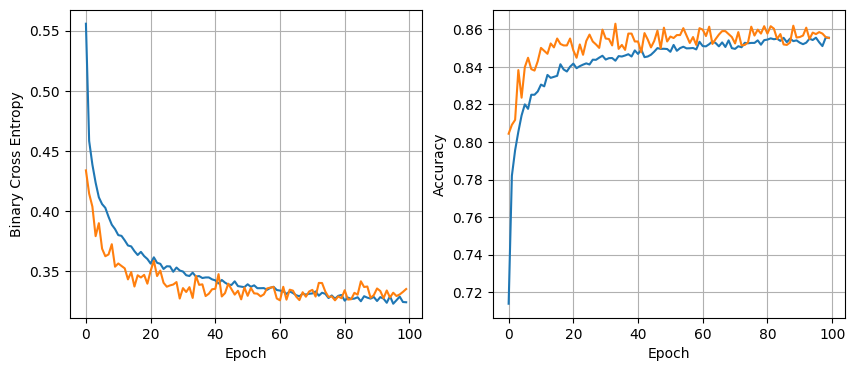

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8513 - loss: 0.3415
32 nodes, dropout 0.2, alpha 0.001, batch_size 128


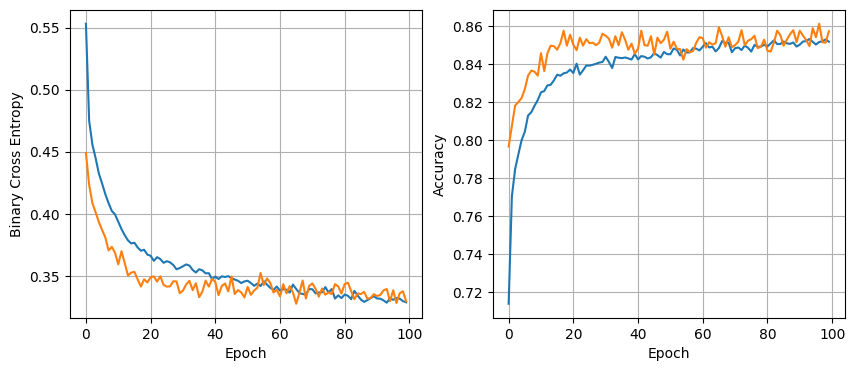

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8538 - loss: 0.3384
64 nodes, dropout 0, alpha 0.1, batch_size 32


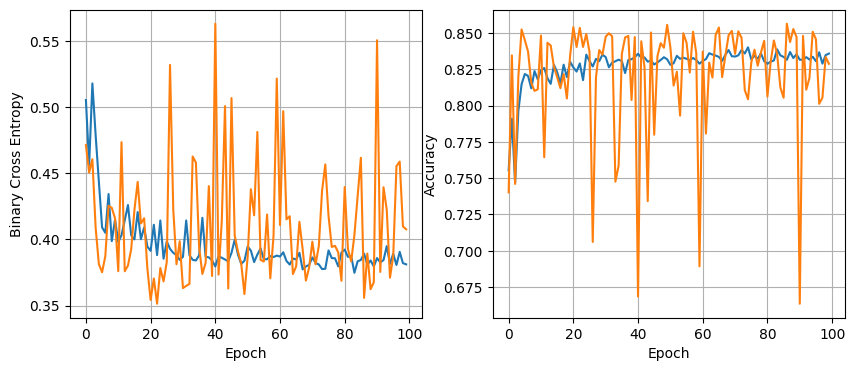

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8272 - loss: 0.4139
64 nodes, dropout 0, alpha 0.1, batch_size 64


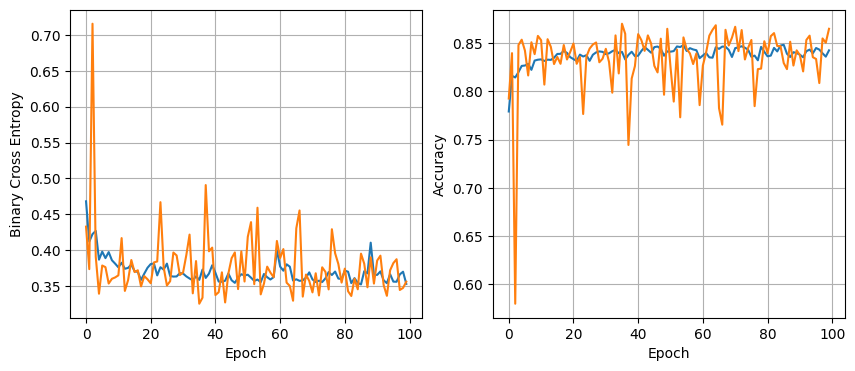

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8675 - loss: 0.3668
64 nodes, dropout 0, alpha 0.1, batch_size 128


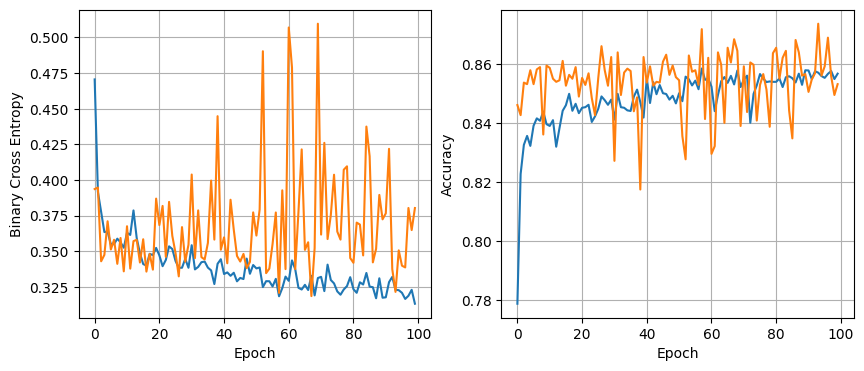

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8500 - loss: 0.3822
64 nodes, dropout 0, alpha 0.005, batch_size 32


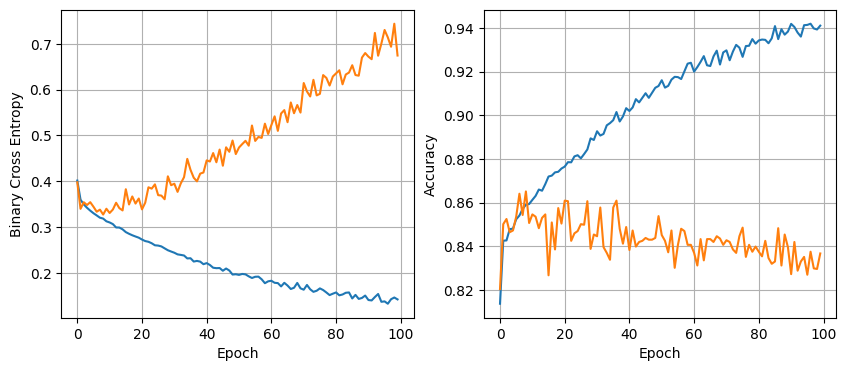

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8340 - loss: 0.6983
64 nodes, dropout 0, alpha 0.005, batch_size 64


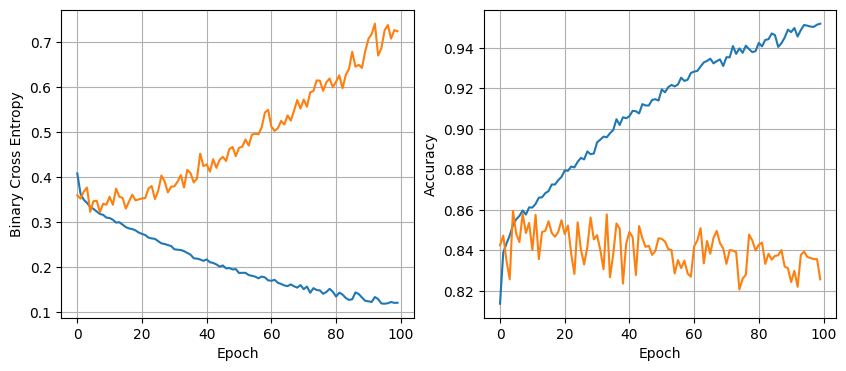

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8236 - loss: 0.7454
64 nodes, dropout 0, alpha 0.005, batch_size 128


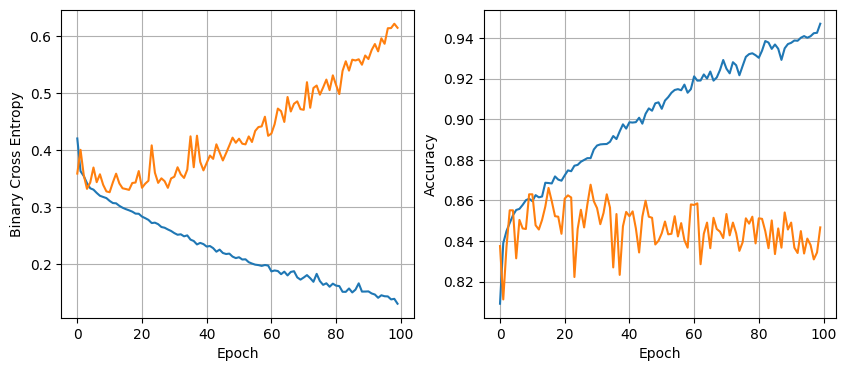

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8411 - loss: 0.6305
64 nodes, dropout 0, alpha 0.001, batch_size 32


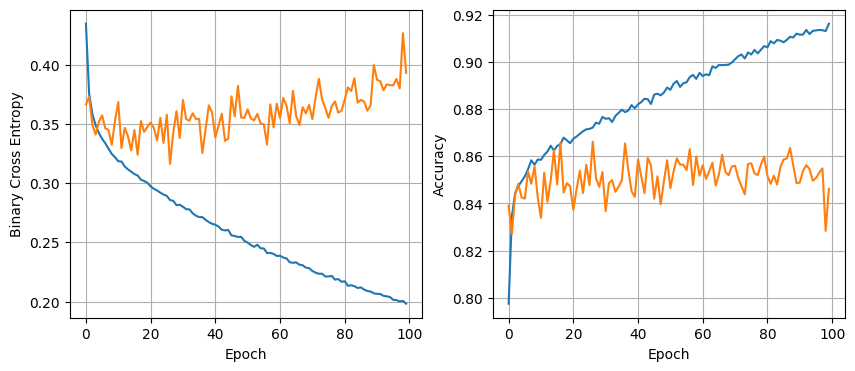

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8417 - loss: 0.4108
64 nodes, dropout 0, alpha 0.001, batch_size 64


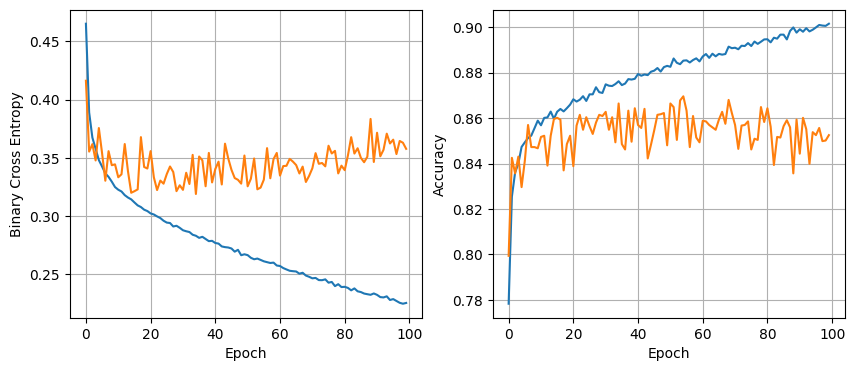

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8503 - loss: 0.3608
64 nodes, dropout 0, alpha 0.001, batch_size 128


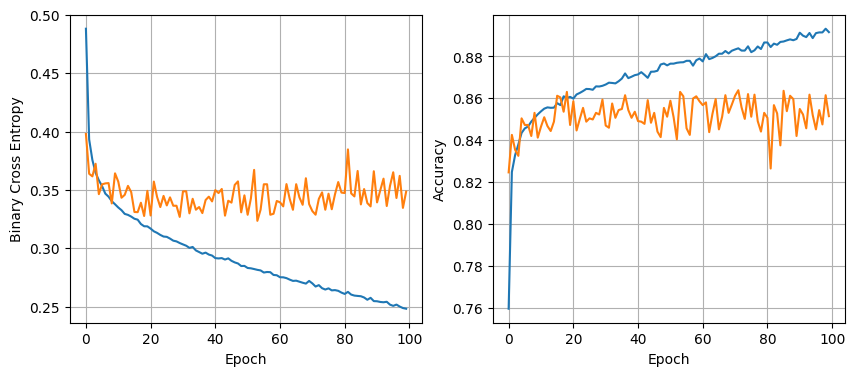

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8473 - loss: 0.3568
64 nodes, dropout 0.2, alpha 0.1, batch_size 32


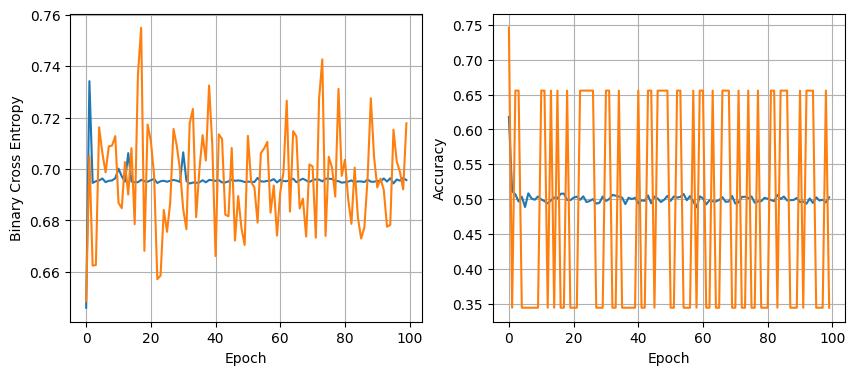

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3488 - loss: 0.7172
64 nodes, dropout 0.2, alpha 0.1, batch_size 64


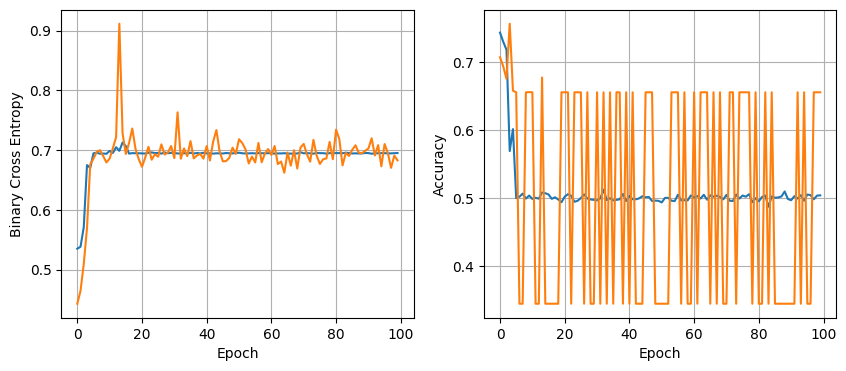

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6512 - loss: 0.6830
64 nodes, dropout 0.2, alpha 0.1, batch_size 128


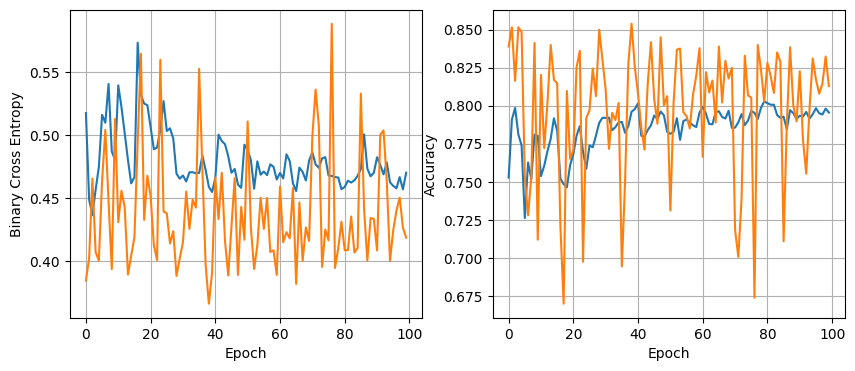

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8070 - loss: 0.4229
64 nodes, dropout 0.2, alpha 0.005, batch_size 32


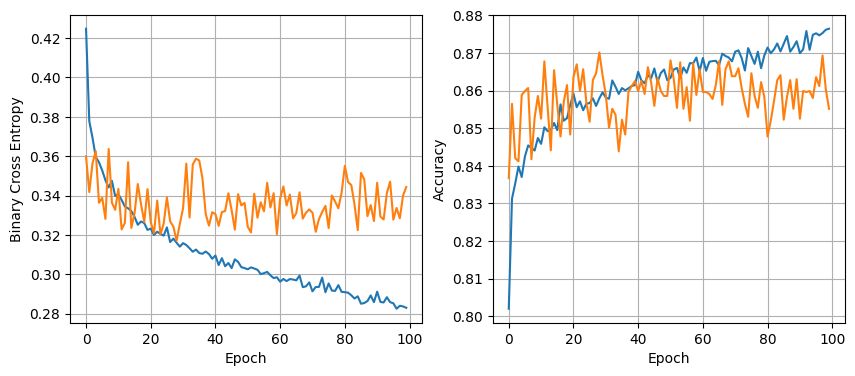

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8506 - loss: 0.3471
64 nodes, dropout 0.2, alpha 0.005, batch_size 64


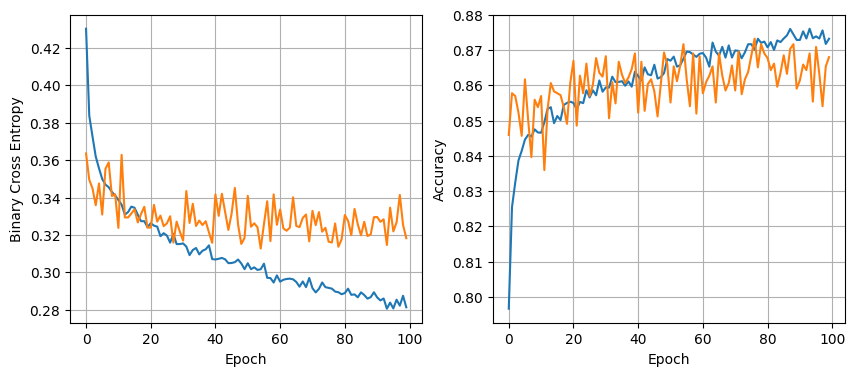

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8683 - loss: 0.3195
64 nodes, dropout 0.2, alpha 0.005, batch_size 128


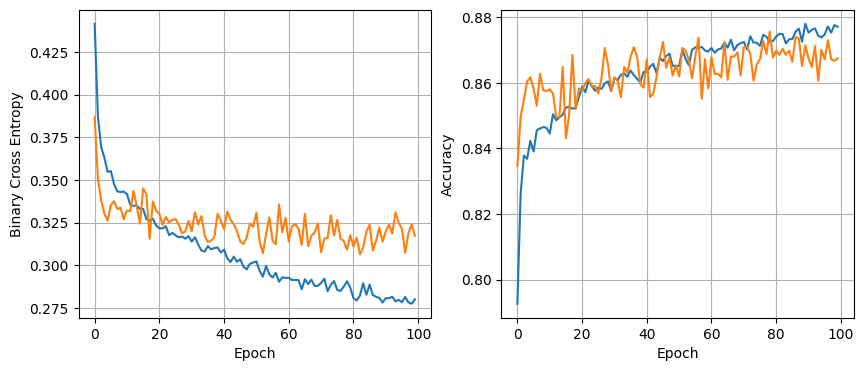

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8665 - loss: 0.3186
64 nodes, dropout 0.2, alpha 0.001, batch_size 32


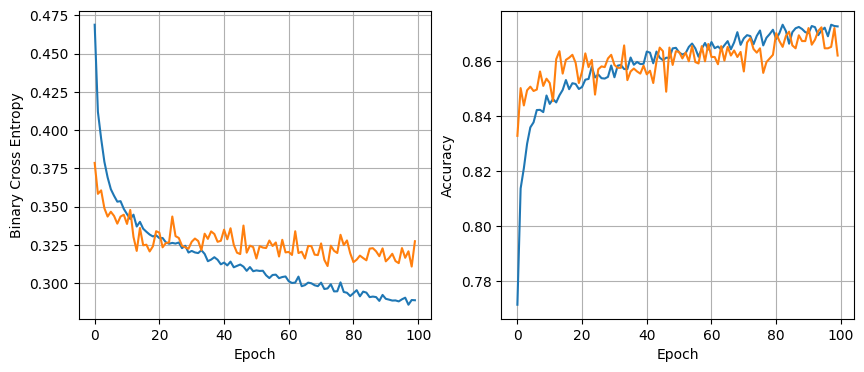

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8629 - loss: 0.3281
64 nodes, dropout 0.2, alpha 0.001, batch_size 64


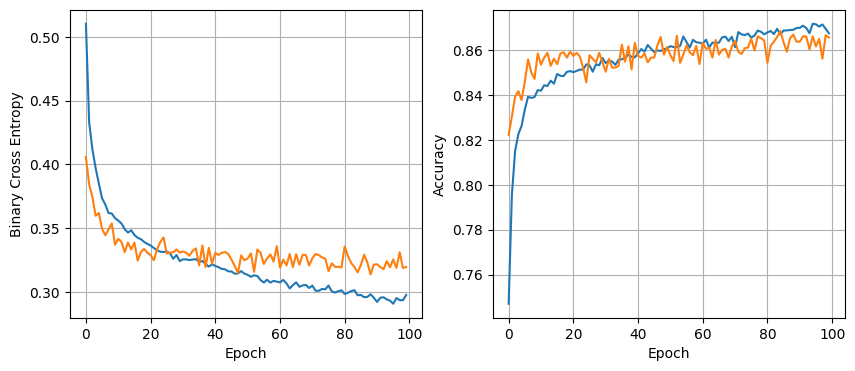

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8610 - loss: 0.3246
64 nodes, dropout 0.2, alpha 0.001, batch_size 128


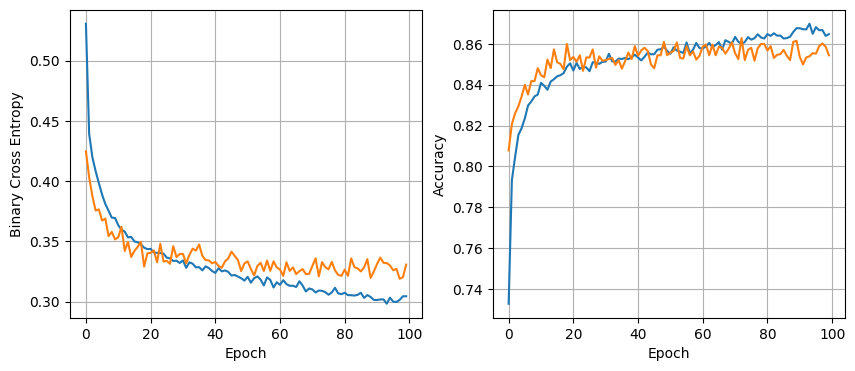

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8489 - loss: 0.3386


In [32]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for alpha in [0.1, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, alpha {alpha}, batch_size {batch_size}")
        model, history = train_nn_model(x_train, y_train, num_nodes, dropout_prob, alpha, batch_size, epochs)
        plot_history(history)
        val_loss, val_accuracy = model.evaluate(x_valid, y_valid)
        if val_loss < least_val_loss :
          least_val_loss = val_loss
          least_loss_model = model

In [33]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
print(f"predicted: {y_pred}\nactual: {y_test}\n")
print(classification_report(y_test, y_pred))

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
predicted: [1 0 0 ... 0 0 1]
actual: [1 1 0 ... 0 0 1]

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1351
           1       0.91      0.91      0.91      2453

    accuracy                           0.88      3804
   macro avg       0.87      0.87      0.87      3804
weighted avg       0.88      0.88      0.88      3804

